# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousedata_complete = pd.merge(study_results,mouse_metadata, how = 'left', on =['Mouse ID'])

# Display the data table for preview

mousedata_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [77]:
# Checking the number of mice.
num_of_mice = mousedata_complete['Mouse ID'].nunique()
num_of_mice

249

In [78]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mousedata_complete[mousedata_complete.duplicated (['Mouse ID', 'Timepoint'],keep = False)]
duplicate_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [79]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID = mousedata_complete[mousedata_complete['Mouse ID'] == 'g989']
duplicate_mice_ID.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [80]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mousedata = mousedata_complete[mousedata_complete['Mouse ID']!= 'g989']
clean_mousedata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [81]:
# Checking the number of mice in the clean DataFrame.
num = clean_mousedata['Mouse ID'].nunique()
num

248

## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_of_tumor = mousedata_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_of_tumor = mousedata_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_of_tumor = mousedata_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_of_tumor = mousedata_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_of_tumor = mousedata_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({'Mean Tumor Volume':mean_of_tumor,
                                  'Median Tumor Volume': median_of_tumor,
                                   'Tumor Volume Variance': var_of_tumor,
                                   'Tumor Volume Std. Dev.': std_of_tumor,
                                   'Tumor Volume Std. Err.': sem_of_tumor
                                  })
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat = mousedata_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median',
                                                                                       'var','std','sem'])
summary_stat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

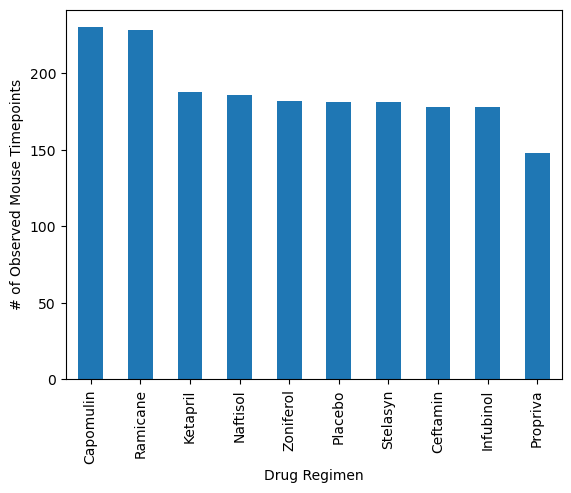

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = clean_mousedata.groupby(['Drug Regimen'])['Timepoint'].size().sort_values(ascending= False)
total_rows.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

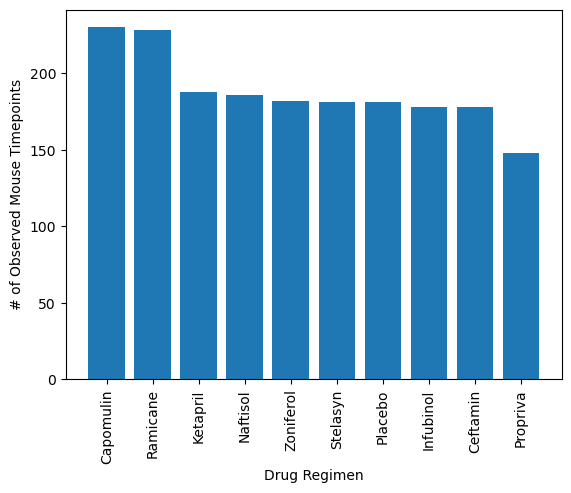

In [85]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis= clean_mousedata['Drug Regimen']. value_counts()
x_axis = y_axis.index
plt.bar(x_axis,y_axis)
plt.xticks(rotation = 'vertical')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

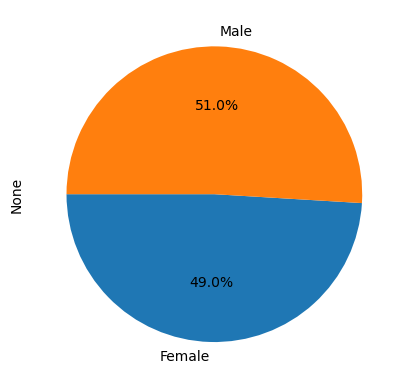

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_mousedata.groupby(['Sex']).size()
sex_count.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 180)
plt.show()

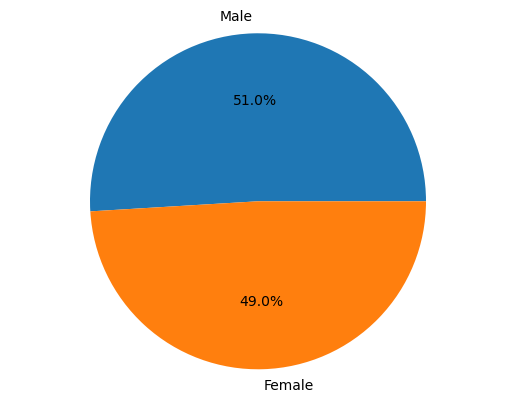

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ('Male', 'Female')
plt.pie(clean_mousedata['Sex'].value_counts(), labels = labels, autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mousedata.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(last_timepoint, clean_mousedata, on=['Mouse ID', 'Timepoint'], how='left')
merged_df

# treatment_regimen= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# final_tumor_volume = merged_df[merged_df['Drug Regimen'].isin(treatment_regimen)]
# final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [89]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in treatment_regimen:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_df.loc[merged_df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    # Add subset 
    tumor_volume.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    
    # Print the results for each treatment regimen
    print(f"Treatment Regimen: {regimen}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("----------------------------------------")


Treatment Regimen: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
----------------------------------------
Treatment Regimen: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
----------------------------------------
Treatment Regimen: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
----------------------------------------
Treatment Regimen: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
----------------------------------------


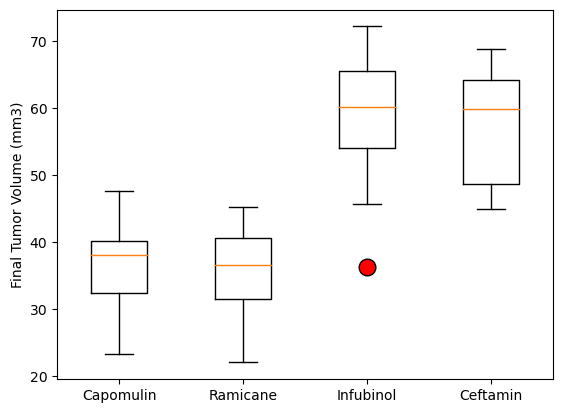

In [90]:
# Generate a box plot t hat shows the distrubution of the tumor volume for each treatment group.
flierprops =dict(marker='o', markerfacecolor='red', markersize=12)
plt.boxplot(tumor_volume, labels=treatment_regimen, flierprops= flierprops)

# Add labels and title
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

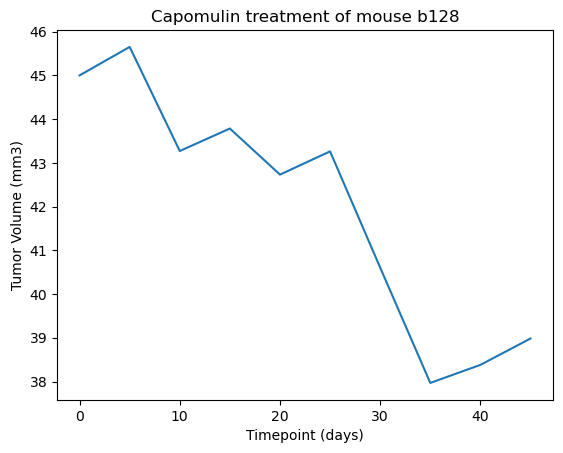

In [91]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin = clean_mousedata[clean_mousedata['Drug Regimen']== 'Capomulin']
single_mouse_data = Capomulin[Capomulin['Mouse ID']== 'b128']

x_axis = single_mouse_data['Timepoint']
y_axis = single_mouse_data['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b128')

plt.show()

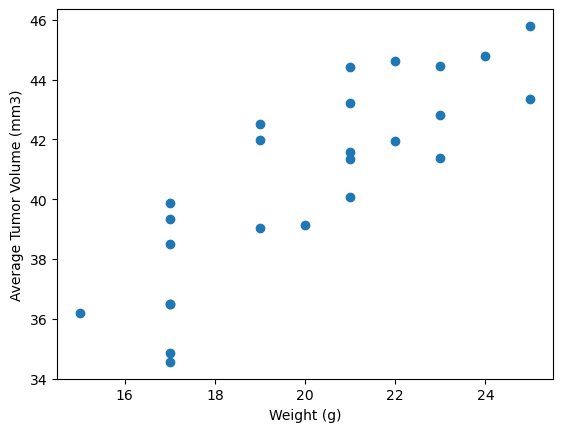

In [92]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

weights = Capomulin.groupby('Mouse ID')['Weight (g)']. mean()
avg_volume = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)']. mean()

plt.scatter(weights, avg_volume, marker='o')

plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.71


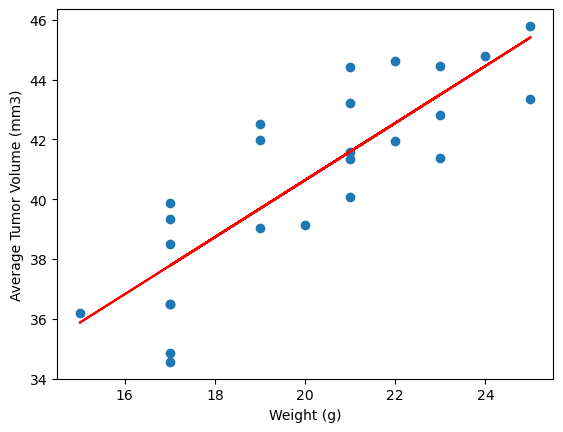

In [100]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weights = Capomulin.groupby('Mouse ID')['Weight (g)']. mean()
avg_volume = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)']. mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, avg_volume)
plt.scatter(weights, avg_volume, marker='o')
regress_values = weights * slope + intercept
plt.plot(weights, regress_values, "r-")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

print(f"The correlation between mouse weight and the average tumor volume is {rvalue**2:.2f}")

plt.show()